In [21]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web

In [22]:
doge = web.DataReader('MONA-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,3.039360,2.840420,2.855220,2.967630,4630550,2.967630
2017-11-10,2.993850,2.606440,2.959770,2.616590,3069090,2.616590
2017-11-11,2.714720,2.520320,2.627440,2.597220,3258960,2.597220
2017-11-12,3.109670,2.173080,2.598040,2.817210,9822060,2.817210
2017-11-13,3.254420,2.666150,2.795100,2.895720,9818930,2.895720
...,...,...,...,...,...,...
2022-04-23,0.885708,0.871124,0.879145,0.884427,140017,0.884427
2022-04-24,0.885972,0.868216,0.884369,0.873724,136827,0.873724
2022-04-25,0.875614,0.854594,0.873874,0.871669,374417,0.871669


In [23]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmsamo.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

        High       Low      Open     Close   Volume  Adj Close  Polarity Score
0   0.040466  0.038822  0.039959  0.039110  4540382   0.039110        0.095867
1   0.021496  0.019967  0.021055  0.020416  2354228   0.020416        0.146020
2   0.021305  0.020069  0.021282  0.020087  3187547   0.020087        0.138143
3   0.025363  0.023064  0.024562  0.023468  8960013   0.023468        0.146417
4   0.039302  0.037781  0.039100  0.037854  3339748   0.037854        0.071015
5   0.022670  0.020282  0.020413  0.022599  3856593   0.022599        0.096342
6   0.020115  0.018978  0.020089  0.018994  3477669   0.018994        0.085107
7   0.023528  0.021745  0.023468  0.022119  5626143   0.022119        0.090832
8   0.025356  0.024005  0.025151  0.024209  3576206   0.024209        0.113200
9   0.017831  0.017032  0.017716  0.017041  2511868   0.017041        0.111060
10  0.020210  0.018104  0.018191  0.020164  8103112   0.020164        0.119920
11  0.024229  0.022444  0.024200  0.022548  7630065 

In [24]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [25]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [26]:
n_train

42

In [27]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [28]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [29]:
X_test

array([[1.88020002e-02, 1.79169998e-02, 1.87839996e-02, 4.13501900e+06,
        1.79580003e-02, 2.27658000e-01],
       [1.78989992e-02, 1.58699993e-02, 1.77940000e-02, 5.39305800e+06,
        1.58709995e-02, 1.64302360e-01],
       [1.97170004e-02, 1.89939998e-02, 1.95710007e-02, 2.98615500e+06,
        1.90319996e-02, 1.99485454e-01],
       [1.84509996e-02, 1.73230004e-02, 1.79590005e-02, 4.78698700e+06,
        1.84509996e-02, 1.69029840e-01],
       [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
        2.02270001e-02, 1.31502325e-01],
       [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
        2.24239994e-02, 1.53586280e-01],
       [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.53299600e+06,
        2.27899998e-02, 1.14973180e-01],
       [2.28049997e-02, 2.16910001e-02, 2.27889996e-02, 5.60957000e+06,
        2.26099994e-02, 1.07060620e-01]])

In [30]:
y_test

array([0.017958, 0.015871, 0.019032, 0.018451, 0.020227, 0.022424,
       0.02279 , 0.02261 ])

In [31]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [32]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [33]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(1, 5, 6) (1,)


In [34]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 32)             4992      
                                                                 
 dropout_2 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=20,
                                        verbose=1,
                                        validation_data=val_data_gen)

Epoch 1/20


C:\Users\moham\AppData\Local\Temp/ipykernel_22012/192094070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


10/10 [==============================] - 4s 143ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 2/20
10/10 [==============================] - 0s 15ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 4.0313e-04 - val_mse: 4.0313e-04
Epoch 3/20
10/10 [==============================] - 0s 13ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 6.9767e-04 - val_mse: 6.9767e-04
Epoch 4/20
10/10 [==============================] - 0s 14ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 1.8671e-04 - val_mse: 1.8671e-04
Epoch 5/20
10/10 [==============================] - 0s 16ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/20
10/10 [==============================] - 0s 15ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 2.1917e-04 - val_mse: 2.1917e-04
Epoch 7/20
10/10 [==============================] - 0s 17ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 1.3789e-04 - val_mse: 1.3789e-04
Epoch 8/20
10/10 [==============================] - 0

In [36]:
pred = model_lstm.predict(test_data_gen)

In [37]:
test_data_gen[0]

(array([[[1.88020002e-02, 1.79169998e-02, 1.87839996e-02, 4.13501900e+06,
          1.79580003e-02, 2.27658000e-01],
         [1.78989992e-02, 1.58699993e-02, 1.77940000e-02, 5.39305800e+06,
          1.58709995e-02, 1.64302360e-01],
         [1.97170004e-02, 1.89939998e-02, 1.95710007e-02, 2.98615500e+06,
          1.90319996e-02, 1.99485454e-01],
         [1.84509996e-02, 1.73230004e-02, 1.79590005e-02, 4.78698700e+06,
          1.84509996e-02, 1.69029840e-01],
         [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
          2.02270001e-02, 1.31502325e-01]],
 
        [[1.78989992e-02, 1.58699993e-02, 1.77940000e-02, 5.39305800e+06,
          1.58709995e-02, 1.64302360e-01],
         [1.97170004e-02, 1.89939998e-02, 1.95710007e-02, 2.98615500e+06,
          1.90319996e-02, 1.99485454e-01],
         [1.84509996e-02, 1.73230004e-02, 1.79590005e-02, 4.78698700e+06,
          1.84509996e-02, 1.69029840e-01],
         [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.1

In [38]:
pred

array([[-0.01335494],
       [-0.01335494],
       [-0.01335494]], dtype=float32)

In [39]:
import matplotlib.pyplot as plt

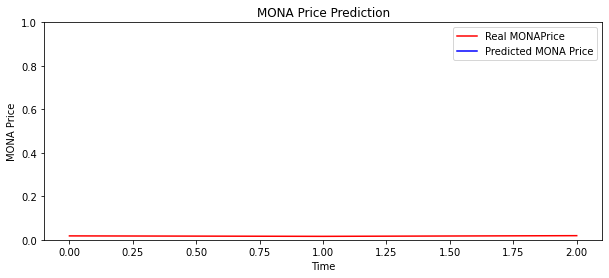

In [40]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real MONAPrice')
plt.plot(pred, color = 'blue', label = 'Predicted MONA Price')
plt.title('MONA Price Prediction')
plt.xlabel('Time')
plt.ylabel('MONA Price')
plt.ylim(0,1)
plt.legend()
plt.show()